# Question 1 of Assignment 2

I have chosen the data on the district-wise distribution of Primary, Middle and High schools of girls and boys in Himachal Pradesh from this [website](https://data.gov.in/resource/district-wise-enrolment-students-school-during-2020-21).



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Enrolmen-in-District-wise-during-2020-21.csv')

## District-wise distribution

The following bar plot shows the total number of schools in the 12 different districts of Himachal Pradesh. Paired with the data regarding the area and population of these districts we could have found correlations with the literacy and education.

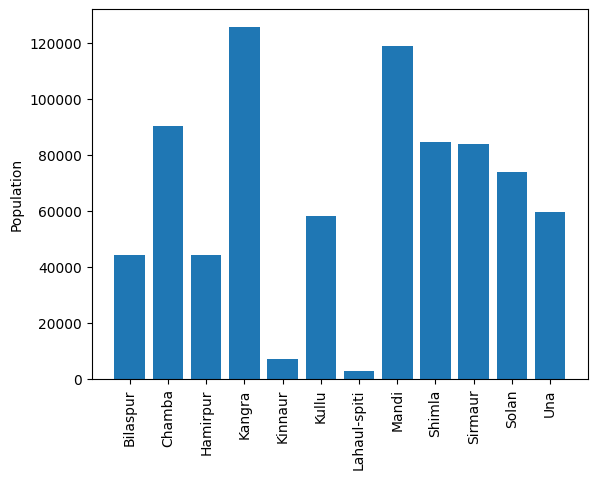

In [3]:
districts = df["District"][:-1]
n_schools = df.iloc[:-1,4::3].sum(1).to_numpy()
plt.ylabel("Population")
plt.xticks(rotation=90)
plt.bar(districts,n_schools)
plt.show()

We see that the fraction of middle schools are lower than the primary schools and high schools across all districts.
In the following plot we have shown the fraction of primary, middle and high schools in the colours blue orange and green respectively for each district.

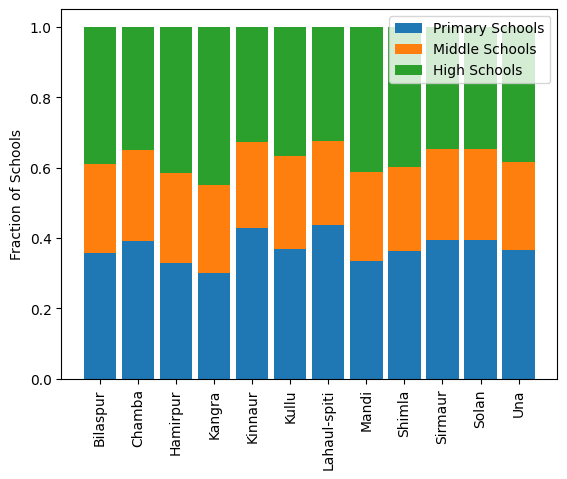

In [6]:
n_school_level = [df.iloc[:-1,i].to_numpy() / n_schools for i in range(4,11,3)]
plt.bar(districts,n_school_level[0], width=0.85, label = "Primary Schools")
plt.bar(districts,n_school_level[1],bottom=n_school_level[0], width=0.85, label = "Middle Schools")
plt.bar(districts,n_school_level[2],bottom=[i+j for i,j in zip (n_school_level[0],n_school_level[1])], width=0.85, label = "High Schools")
plt.xticks(rotation=90)
plt.ylabel('Fraction of Schools')
plt.legend()
plt.show()


Similar trend of lower number of middle schools can be seen in the following box plot. The outliers seen for the number high schools is for the district Kangra. A possible inference could be that high school students from other districts come to Kangra for their education. Thus, more variation in the number of high schools can be inferred to be a sign of students travelling long distances for higher education.

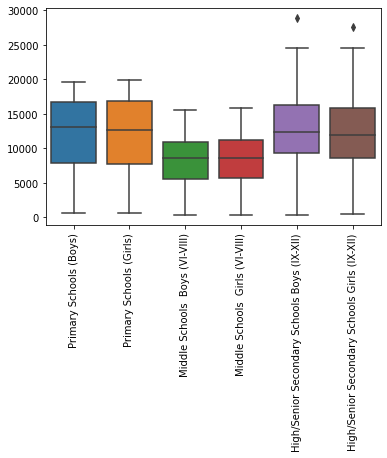

In [4]:
plt.xticks(rotation=90)
sns.boxplot(data = df.iloc[:-1,[2,3,5,6,8,9]])
plt.show()

The following pair plot shows conclusively that the number of primary, middle and high schools are strongly correlated. It also confirms our previous inferences that there are less number of middle schools than primary and high schools and that the distribution of high schools have higher variation.

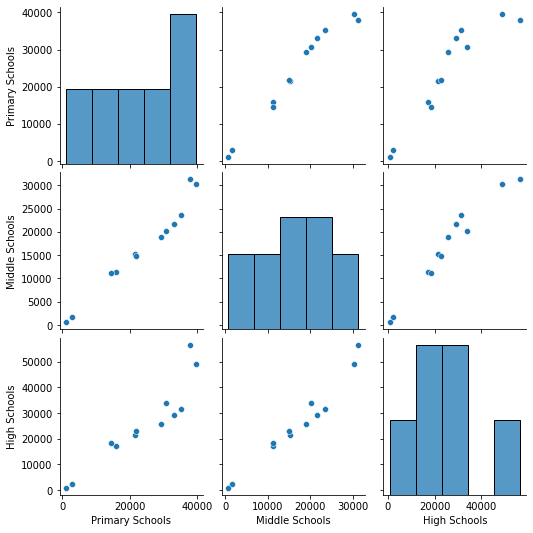

In [5]:
school_tot = df.iloc[:-1,[4,7,10]]
school_tot.columns = ['Primary Schools', 'Middle Schools', 'High Schools']
sns.pairplot(data = school_tot, aspect = 1)
plt.show()

## Trends in the number of girls and boys schools

The following code provides a scatter where on the x-coordinate is the number of boys schools and the y-coordinate is the number of girls school in a given district. Accompanying with the scatter plots is the $y=x$ lines. The data points being close to this line indicates that the number of boys and girls are almost equal in number.

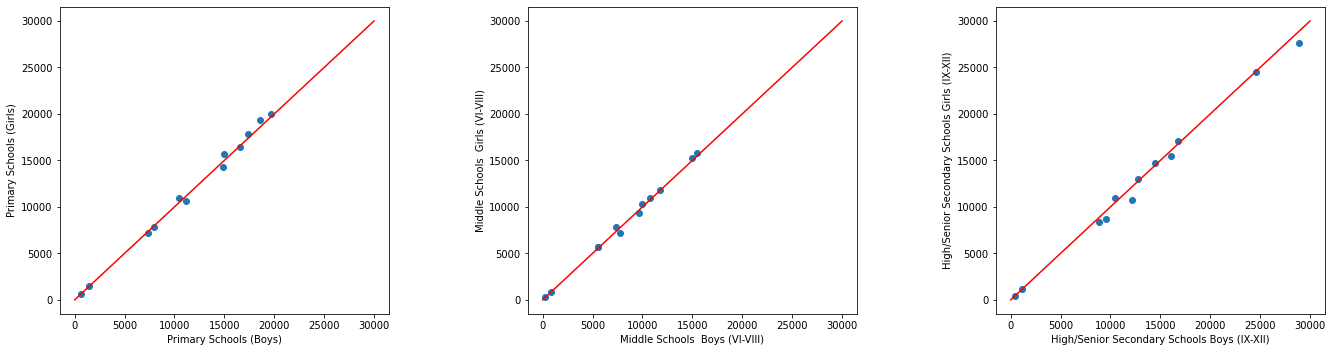

In [6]:
boys_school_col = [ [col,df[col]] for col in df.columns[2::3] ]
girls_school_col = [ [col,df[col]] for col in df.columns[3::3] ]

fig, axs = plt.subplots(1,3)
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(20)
for i in range(3):
    axs[i].scatter(boys_school_col[i][1][:-1], girls_school_col[i][1][:-1])
    axs[i].plot([0,30000], [0,30000], 'r')
    axs[i].set(xlabel=boys_school_col[i][0], ylabel=girls_school_col[i][0])
plt.show()